<a href="https://colab.research.google.com/github/danhorsley/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Copy_of_LS_DS_113_Basic_Data_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Basic Data Visualizations

A picture is worth a thousand words. So, without any further ado:

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Pilieroa/Colab-Data/master/wiki_movie_plots_deduped.csv')
df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,Unnamed: 8
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr...",NaN
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov...",NaN
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed...",NaN
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...,NaN
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,NaN


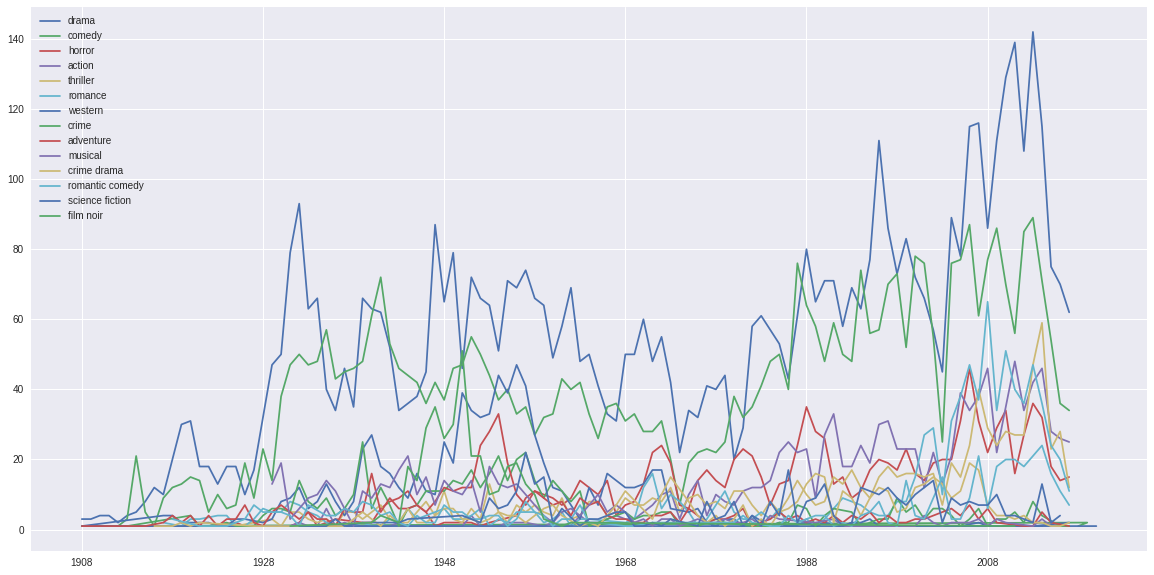

In [3]:
top_genres = df['Genre'].value_counts()[1:15]
topgenre_list = list(top_genres.index)
df_groupedcount = pd.DataFrame(df.copy().groupby('Release Year')['Genre'].value_counts())
plt.figure(figsize=(20,10))
plt.xticks(np.arange(1900,step=20))
for genre in topgenre_list:
    #df_groupedcount.xs(genre,level='Genre')
    df_groupedcount.columns=[genre]
    xx = df_groupedcount.xs(genre,level='Genre').index
    yy = df_groupedcount.xs(genre,level='Genre')[genre]
    plt.plot(xx,yy)
plt.legend(loc='upper left')

#plt.xticks(np.arange(1900,step=20))
plt.show()


In [4]:
less_genres = df['Genre'].value_counts()[1:10]
less_genres_list = list(less_genres.index)
df_new = pd.DataFrame(df.copy().groupby('Release Year')['Genre'].value_counts())

collist = []
for genre in less_genres_list:
    
    df_new.columns=[genre]
    
    newcol = df_new.xs(genre,level='Genre')[genre]
    collist.append(newcol)


tdf = pd.DataFrame(collist).T
tdf = tdf.fillna(value=0)
tdf.head()

,drama,comedy,horror,action,thriller,romance,western,crime,adventure
1903,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1904,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1907,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1908,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1909,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


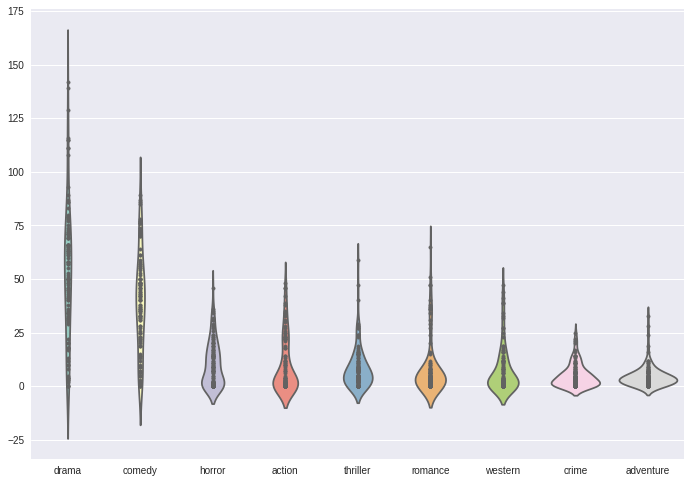

In [5]:
#seaborn violin chart
import seaborn as sns
sns.set()
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(ax = ax, data=tdf, palette='Set3', inner="points")

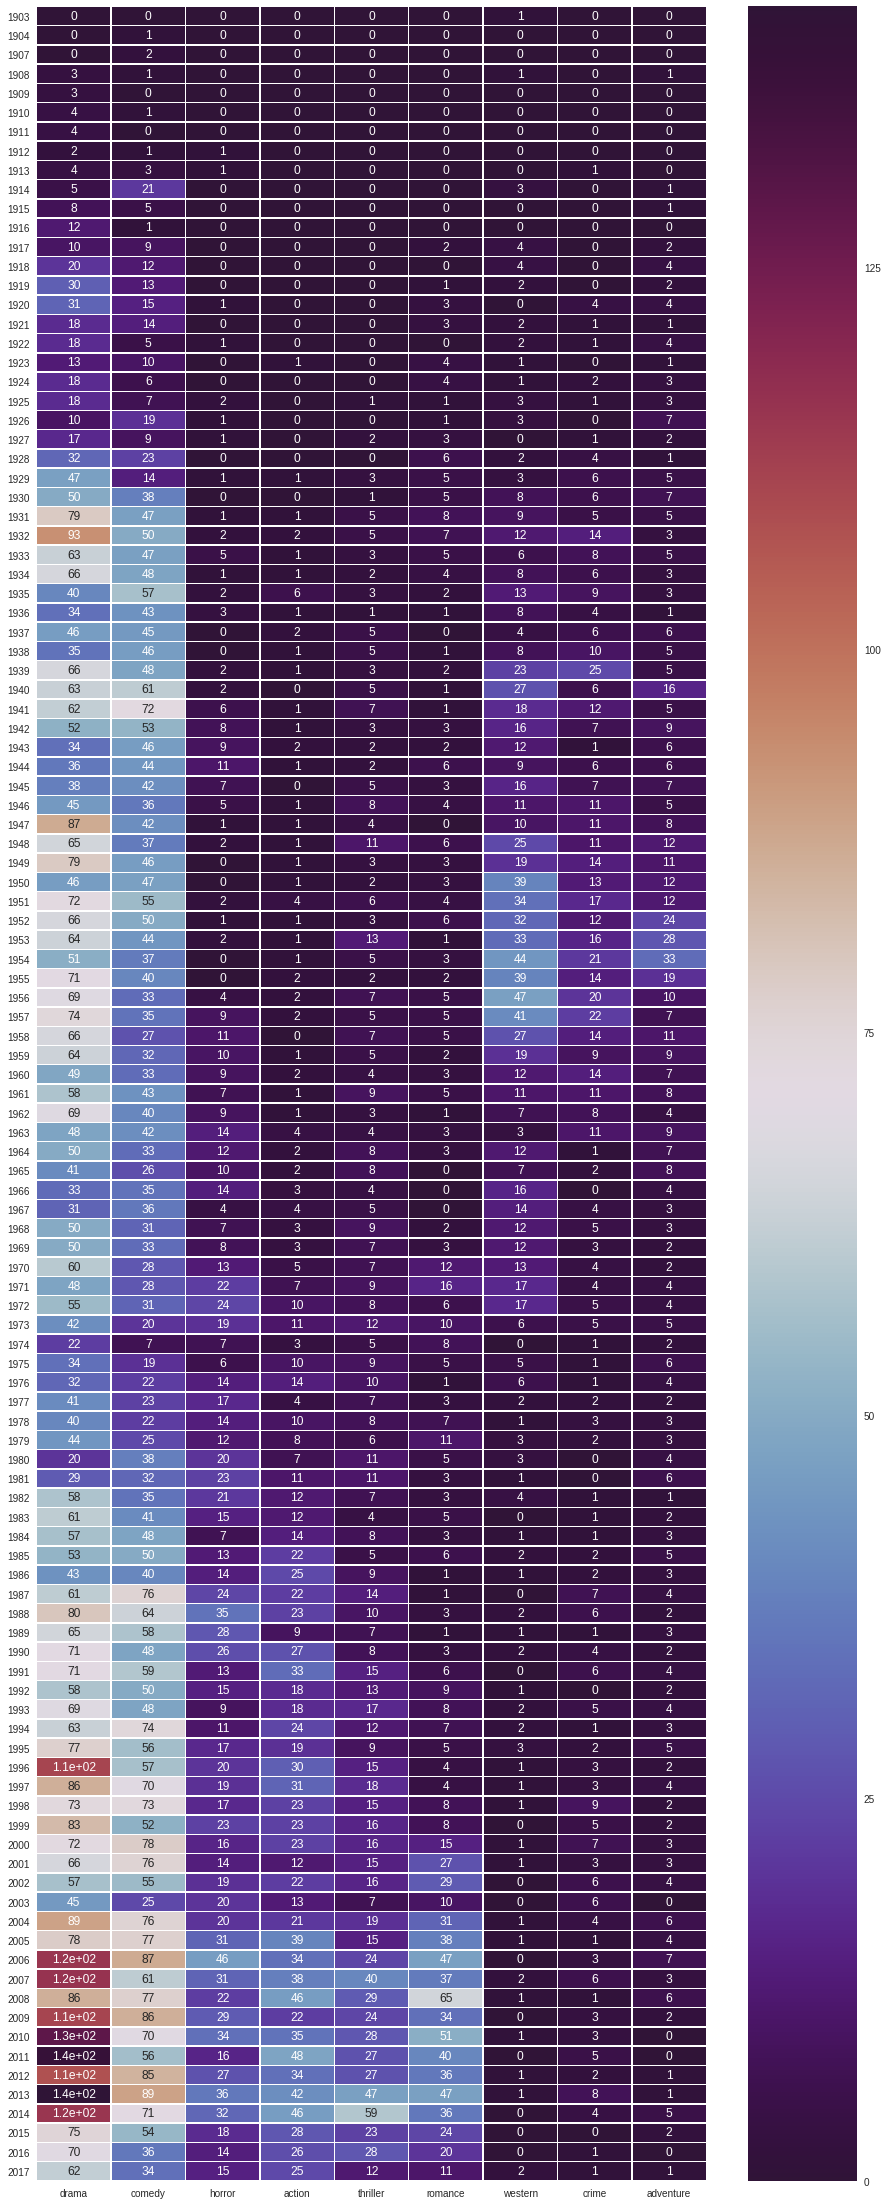

In [6]:
#seaborn heatmap
new_dims = (15, 40)
fig, ax1 = plt.subplots(figsize=new_dims)
sns.heatmap(tdf, annot=True, cmap='twilight_shifted',linewidths=.5, ax=ax1)

2

Text(0.5, 0, 'drama')

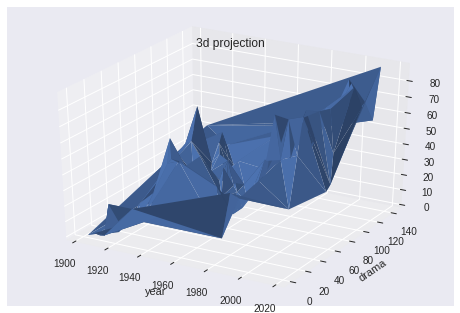

In [41]:
#completely unreadable 3d chart
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm


X = tdf.index.values
Y = tdf['drama'].values
Z = tdf['comedy'].values

fig3d = plt.figure()
ax3d = fig3d.gca(projection='3d')
ax3d.plot_trisurf(list(X),list(Y),list(Z))
plt.title('3d projection')
plt.title('3d projection')
plt.xlabel('year')
plt.ylabel('drama')
#plt.zlabel('comedy')

1903     0.0
1904     0.0
1907     0.0
1908     0.0
1909     0.0
1910     0.0
1911     0.0
1912     1.0
1913     1.0
1914     0.0
1915     0.0
1916     0.0
1917     0.0
1918     0.0
1919     0.0
1920     1.0
1921     0.0
1922     1.0
1923     0.0
1924     0.0
1925     2.0
1926     1.0
1927     1.0
1928     0.0
1929     1.0
1930     0.0
1931     1.0
1932     2.0
1933     5.0
1934     1.0
        ... 
1988    35.0
1989    28.0
1990    26.0
1991    13.0
1992    15.0
1993     9.0
1994    11.0
1995    17.0
1996    20.0
1997    19.0
1998    17.0
1999    23.0
2000    16.0
2001    14.0
2002    19.0
2003    20.0
2004    20.0
2005    31.0
2006    46.0
2007    31.0
2008    22.0
2009    29.0
2010    34.0
2011    16.0
2012    27.0
2013    36.0
2014    32.0
2015    18.0
2016    14.0
2017    15.0
Name: horror, Length: 113, dtype: float64

## Lecture Example

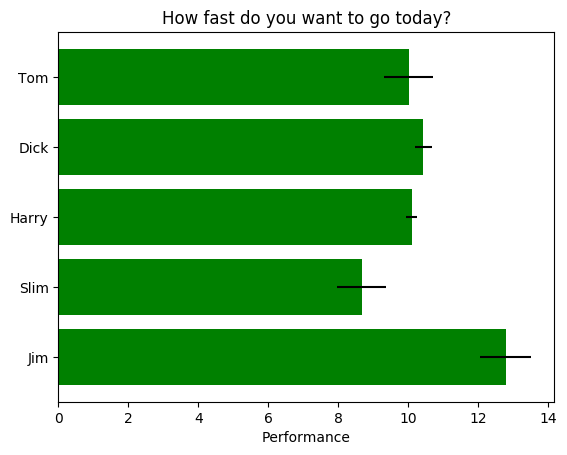

In [0]:
# https://matplotlib.org/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

The above is fairly clear. It's a lot less clear as a piechart.

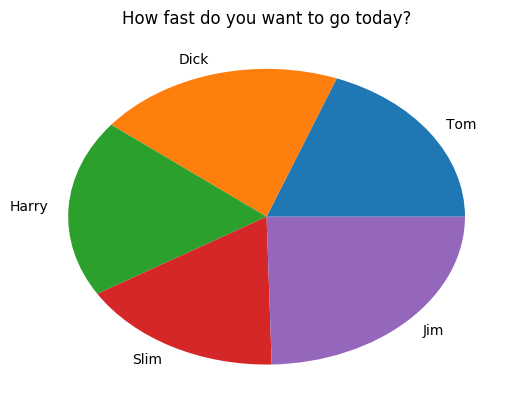

In [0]:
# Adapted to piechart
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.pie(performance, labels=people)
ax.set_title('How fast do you want to go today?')

plt.show()


What about continuous data? Scatterplot is a natural fit, and higher dimensions can be represented by size, color, or other visual aspects of the points.

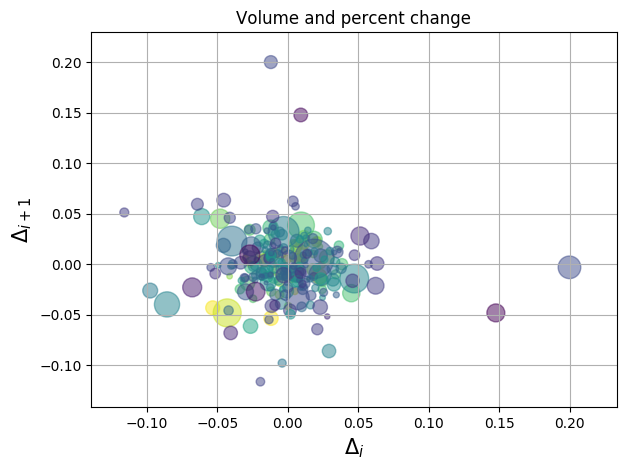

In [0]:
# https://matplotlib.org/gallery/lines_bars_and_markers/scatter_demo2.html#sphx-glr-gallery-lines-bars-and-markers-scatter-demo2-py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

An alternative way to represent higher dimensional data is with 3D scatterplots - but these are pretty hard to look at. Specifically, if it's not interactive (you can't drag it and move it around), your eye may not be able to distinguish which spatial dimension is separating two specific points.

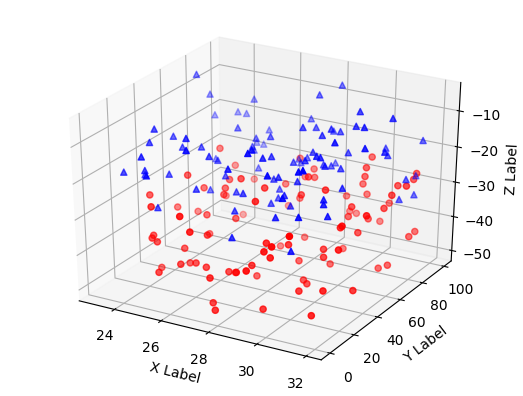

In [0]:
# https://matplotlib.org/gallery/mplot3d/scatter3d.html#sphx-glr-gallery-mplot3d-scatter3d-py
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

Live lecture - let's pick some plots and try them!
- https://matplotlib.org/gallery - the foundational Python plotting library
- https://seaborn.pydata.org/examples/index.html - opinionated, built on matplotlib so less configurable but arguably more usable/pretty (or easy to make pretty)
- http://ggplot.yhathq.com/ - based on R's ggplot2 (the "Grammar of Graphics", a consistent and widely used foundation of plotting, particularly by academics)
- https://bokeh.pydata.org/en/latest/ - interactive plots - write in Python, build and serve in HTML and JavaScript
- https://plot.ly/ - similar to Bokeh but with a commercial service (though the software itself is still open source)
- https://altair-viz.github.io/ - declarative visual graphics - a little different than the matplotlib/seaborn paradigm (based on the Vega Visualization Grammar) 
- https://python.libhunt.com/seaborn-alternatives - even more!



In [0]:
# TODO - fun, possibly interactive plots!

## Assignment - draw some plots!

In the following section you should draw at least *3* plots, using the data you loaded yesterday - the first should be with matplotlib. The other two can be with any Python tool of your choice - Seaborn in particular is suggested to try. It is OK to start with code from a gallery/example or whatever documentation you find, but try to get it working with your own data.

After you make the plots, write a summary (around a paragraph) for each plot, interpreting and describing it and what insight it gives you into the data. This summary should be written for an "interested but non-technical" audience - that is usually the sort of audience data scientists communicate with. Try to *explain* what's going on without making it scary.

Stretch goals:
- Interactive plots! (from the above tools, either Bokeh or plot.ly)
- 3D plots that are intuitive/informative (and probably also interactive)
- Share your plot! Take a screenshot and drop it in the cohort channel or elsewhere in Slack
- Deploy! If it's interactive, you can put it out there (plot.ly will host your plot for you, and Bokeh will make an HTML file)
- Work on your local Python setup - so far we've just used Colab, but [Anaconda](https://www.anaconda.com/download/) is a local environment for Python that lets you do everything you can in Colab and more